In [53]:
import numpy as np
import PickleUtil
import VariantCalling as vc
import matplotlib.pyplot as plt

In [56]:
import tensorflow as tf

# Load the model from a file
model = tf.keras.models.load_model('./drive-download/model1_2')
model2 = tf.keras.models.load_model('./drive-download/model2_2')

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 178, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 178, 64)      4160      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 178, 128)     73856     
                                                                 
 conv2d_transpose (Conv2DTr  (None, 100, 178, 128)     147584    
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 100, 178, 64)      524352    
 Transpose)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 178, 1)       4097  

In [57]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 178, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 178, 64)      2368      
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 178, 128)     73856     
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 100, 178, 128)     147584    
 Transpose)                                                      
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 100, 178, 64)      294976    
 Transpose)                                                      
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 178, 1)       2305

In [6]:
pk = PickleUtil.PickleLoader()

In [23]:
dg = vc.VariantCallingData()

In [37]:
def dna_sequence_to_numeric(dna_sequence_list):
    base_mapping = {"A": 0, "C": 1, "G": 2, "T": 3}
    num_sequences = len(dna_sequence_list)
    max_sequence_length = max(len(seq) for seq in dna_sequence_list)

    # Initialize a 2D NumPy array filled with zeros
    numeric_array = np.zeros((num_sequences, max_sequence_length), dtype=int)

    for i, seq in enumerate(dna_sequence_list):
        for j, base in enumerate(seq):
            numeric_array[i, j] = base_mapping.get(base, -1)

    return numeric_array

In [74]:
[crt_data] = pk.load_pickle()

In [80]:
crt_image_sameple = np.array([dna_sequence_to_numeric(crt_data[1140:1240])]).astype('float32') / 3
crt_image_sameple = crt_image_sameple.reshape(crt_image_sameple.shape[0], 100, 178, 1)
crt_image_sameple.shape

(1, 100, 178, 1)

In [81]:
denoised_image = model.predict(crt_image_sameple)
denoised_image2 = model2.predict(np.round(np.array([denoised_image[0]]) * 3) / 3)

1/1 [==============================] - 0s 13ms/step


In [82]:
reshaped_test_data = np.round(denoised_image[0] * 3).reshape(100,178)
reshaped_test_data2 = np.round(denoised_image2[0] * 3).reshape(100,178)

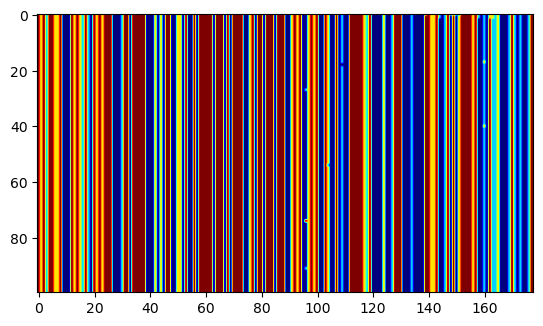

In [83]:
plt.imshow(reshaped_test_data, cmap="jet")

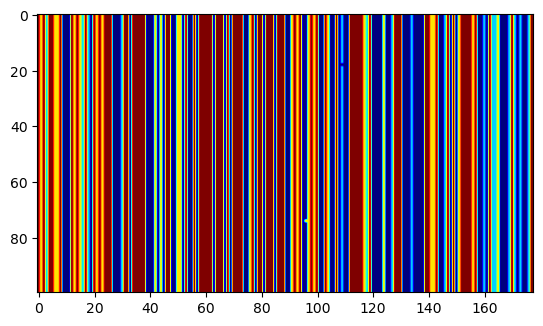

In [84]:
plt.imshow(reshaped_test_data2, cmap="jet")

In [85]:
clone_1  = dg.char_to_int(dg.clones[0])
clone_2  = dg.char_to_int(dg.clones[1])
clone_3  = dg.char_to_int(dg.clones[2])

In [86]:
clone_counter = [0,0,0,0,]
for row in reshaped_test_data:
    if (row == clone_1).all():
        clone_counter[0] += 1
    elif (row == clone_2).all():
        clone_counter[1] += 1
    elif (row == clone_3).all():
        clone_counter[2] += 1
    else:
        clone_counter[3] += 1

clone_counter

[0, 0, 91, 9]